# Video Games Sales analysis 

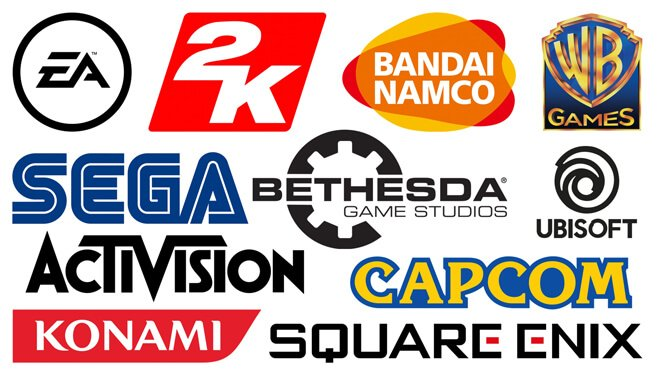

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [ ]:
data_file_path = "/kaggle/input/video-games-sales-2019/vgsales-12-4-2019.csv"
companie_region_path = "/kaggle/input/videogamescompaniesregions/video-games-developers.csv"
total_sales_column = "Total_Sales"

## Load data

In [ ]:
# Load core data
data_df = pd.read_csv(data_file_path)
data_df.head()

In [ ]:
# Load companie-region data
region_df = pd.read_csv(companie_region_path)
region_df.head()

In [ ]:
df = pd.merge(data_df, region_df[['Developer', 'Country']], left_on='Publisher', right_on='Developer', how='left')
df.head()

In [ ]:
df.columns

# Released games by year

In [ ]:
df[total_sales_column] = df['Total_Shipped'].fillna(0) + df['Global_Sales'].fillna(0)

In [ ]:
tdf = df.copy()
# tdf['Year'] = df['Year'].fillna(df['Year'].mean())
tdf = df[df['Year'].notna()] # Carefull about this
tdf = tdf.sort_values('Year', ascending=True)

In [ ]:
fig = px.histogram(
    tdf,
    x='Platform',
    animation_frame='Year',
    range_y=[0, 550],
)
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [ ]:
top_tdf = tdf.groupby(['Platform', 'Year']).agg({total_sales_column: 'count'}).reset_index()
top_tdf.columns = ['Platform', 'Year', 'Count']
top_tdf = top_tdf[top_tdf['Year'].isin([2016, 2017, 2018, 2019])]
top_tdf = top_tdf[top_tdf['Count'] > top_tdf['Count'].sum() * 0.01]
top_tdf['Year'] = top_tdf['Year'].astype(str)


In [ ]:
fig = px.bar(
    top_tdf,
    x='Platform',
    y='Count',
    color='Year',
    barmode="group"
)
fig.update_layout(title="Total released video-games by platform")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

# Sales analysis

In [ ]:
platform_tdf = tdf.groupby(['Platform', 'Year']).agg({total_sales_column: 'sum'}).reset_index()
platform_tdf = platform_tdf.sort_values('Year', ascending=True)
platform_tdf.head()

In [ ]:
fig = px.bar(
    platform_tdf,
    x='Platform',
    y=total_sales_column,
    animation_frame='Year',
    range_y=[0, 150],
)
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [ ]:
platform_top_tdf = platform_tdf[platform_tdf['Year'].isin([2016, 2017, 2018, 2019])]
platform_top_tdf = platform_top_tdf[platform_top_tdf[total_sales_column] > platform_top_tdf[total_sales_column].sum() * 0.005]
platform_top_tdf['Year'] = platform_top_tdf['Year'].astype(str)

fig = px.bar(
    platform_top_tdf,
    x='Platform',
    y=total_sales_column,
    color='Year',
    barmode="group"
)
fig.update_layout(title="Total sales by platforms (Millions)")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

# Aggregated sales analysis 

In [ ]:
platform_sum_tdf = platform_tdf.groupby(['Platform']).agg({total_sales_column: 'sum'}).reset_index()
platform_sum_tdf = platform_sum_tdf[platform_sum_tdf[total_sales_column] > platform_sum_tdf[total_sales_column].sum() * 0.03]

In [ ]:
fig = px.bar(
    platform_sum_tdf,
    x='Platform',
    y=total_sales_column,
)
fig.update_layout(title="Total sales of all time in the most important platforms (Millions)")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [ ]:
platform_tmp_tdf = tdf.groupby(['Platform', 'Year']).agg({total_sales_column: ['sum', 'count']})
# Here we can check 

# Sales Distribution

In [ ]:
df.head()

In [ ]:
regions = ['NA', 'JP', 'PAL', 'Other']
region_sales_sufix = '_Sales'
regions_agg = {}

for region in regions:
    regions_agg[region + region_sales_sufix] = 'sum'

regions_agg[total_sales_column] = 'sum'
regions_agg

In [ ]:
geo_tdf = tdf.groupby(['Year']).agg(regions_agg).reset_index()
geo_tdf = geo_tdf.sort_values('Year', ascending=True)
geo_tdf.head(10)

In [ ]:
fig = go.Figure()

for region in regions:
    
    fig.add_trace(go.Scatter(
        x=geo_tdf['Year'], 
        y=geo_tdf[region + region_sales_sufix], 
        mode='lines',
        name=region,
    ))
fig.update_layout(title="Total sales per year by region (Millions)")
fig.update_xaxes(type='category')
fig.show()

# Distribution of sales by genre

In [ ]:
genre_tdf = tdf.groupby(['Genre']).agg(regions_agg)
genre_tdf = genre_tdf.sort_values(total_sales_column, ascending=False)
genre_tdf.head()

## Distribution of sales by genres and region

In [ ]:
fig = px.imshow(genre_tdf.drop(total_sales_column, 1).T)
fig.update_layout(title="Sales distribution by genre and region (Millions)")
fig.show()

In [ ]:
# Reorder df to total genre scattewr plot
genre_total_tdf = genre_tdf.reset_index().sort_values(total_sales_column, ascending=False)

In [ ]:
fig = go.Figure()
    
fig.add_trace(go.Scatter(
    x=genre_total_tdf['Genre'], 
    y=genre_total_tdf[total_sales_column], 
    mode='lines+markers',
))
fig.update_layout(title="Total sales by genre (Millions)")
fig.update_xaxes(type='category')
# fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
genre_tops = list(genre_total_tdf.loc[genre_total_tdf[total_sales_column] > genre_total_tdf[total_sales_column].sum() * 0.03, 'Genre'])
genre_tops

# Sales distribution by ESRB Rating

In [ ]:
esrb_tdf = tdf.groupby('ESRB_Rating').agg({total_sales_column: 'sum'}).reset_index()
esrb_tdf.head(10)

In [ ]:
fig = px.bar(esrb_tdf, x='ESRB_Rating', y=total_sales_column)
fig.show()

In [ ]:
esrb_tops = list(esrb_tdf.loc[esrb_tdf[total_sales_column] > esrb_tdf[total_sales_column].sum() * 0.03, 'ESRB_Rating'])
esrb_tops

## Distribution of ESRB by region

In [ ]:
esbr_region_tdf = tdf[tdf['ESRB_Rating'].isin(esrb_tops)].groupby(['ESRB_Rating']).agg(regions_agg)
esbr_region_tdf.head()

In [ ]:
z = esbr_region_tdf.drop(total_sales_column, 1).values
x = esbr_region_tdf.drop(total_sales_column, 1).columns.tolist()
y = esbr_region_tdf.drop(total_sales_column, 1).index.tolist()

z_text = np.around(z)

fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='viridis')
fig.update_layout(title="Sales distribution by genre and region (Millions)")
fig.show()

## Distribution of ESRB by Genre

In [ ]:
esrb_genre_tdf = tdf[tdf['ESRB_Rating'].isin(esrb_tops)].groupby(['ESRB_Rating', 'Genre']).agg({total_sales_column: 'sum'}).reset_index()
esrb_genre_tdf.head(10)

In [ ]:
esrb_genre_tdf = esrb_genre_tdf[esrb_genre_tdf['Genre'].isin(genre_tops)]
esrb_genre_tdf = esrb_genre_tdf.pivot(index='ESRB_Rating', columns='Genre', values=total_sales_column)
esrb_genre_tdf.head()

In [ ]:
z = esrb_genre_tdf.values
x = esrb_genre_tdf.columns.tolist()
y = esrb_genre_tdf.index.tolist()

z_text = np.around(z)

fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='viridis')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title="Sales distribution by genre and ESRB (Millions)")
fig.show()

# Publisher analysis

In [ ]:
# Replace nana values in Country before groupby
pub_tdf = tdf.copy()
pub_tdf['Country'] = tdf['Country'].fillna(value='Unknown')

# Groupby publisher and country
pub_tdf = pub_tdf.groupby(['Publisher', 'Country']).agg({total_sales_column: ['sum', 'count']}).reset_index()
pub_tdf.columns = ['Publisher', 'Country', 'Sales_Sum', 'Sales_Count']

pub_tdf = pub_tdf[pub_tdf['Publisher'] != 'Unknown']

pub_tdf.head()

In [ ]:
# Filter 5% over sales or 5% over games published
pub_tdf = pub_tdf[(pub_tdf['Sales_Sum'] > pub_tdf['Sales_Sum'].sum() * 0.01) |
                  (pub_tdf['Sales_Count'] > pub_tdf['Sales_Count'].sum() * 0.01)
                 ]

## Publisher sales by region

In [ ]:
# ad-hoc adjustment for Microsoft and Bandai
microsoft_row = pub_tdf[pub_tdf['Publisher'].str.startswith('Microsoft')].sum()
microsoft_row['Publisher'] = 'Microsoft'
microsoft_row['Country'] = 'United States'
bandai_row = pub_tdf[pub_tdf['Publisher'].str.endswith('Bandai')].sum()
bandai_row['Publisher'] = 'Namco Bandai'
bandai_row['Country'] = 'Japan'

# Drop old columns
pub_tdf = pub_tdf[~pub_tdf['Publisher'].str.startswith('Microsoft')]
pub_tdf = pub_tdf[~pub_tdf['Publisher'].str.endswith('Bandai')]

# Append new rows to teh DF
pub_tdf = pub_tdf.append(microsoft_row, ignore_index=True)
pub_tdf = pub_tdf.append(bandai_row, ignore_index=True)

In [ ]:
pub_tdf = pub_tdf.sort_values('Sales_Sum', ascending=False)
pub_tdf.head()

In [ ]:
publisher_tops = list(pub_tdf['Publisher'])
len(publisher_tops)

In [ ]:
fig = px.scatter(
    pub_tdf,
    x='Publisher',
    y='Sales_Sum',
    size='Sales_Count',
    color='Country',
)
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title="Sales by publisher and region (Millions)")
fig.show()

# Genres by publisher

In [ ]:
pub_genre_df = tdf.groupby(['Publisher', 'Genre']).agg(regions_agg).reset_index()
pub_genre_df = pub_genre_df[pub_genre_df['Publisher'].isin(publisher_tops)]
pub_genre_df = pub_genre_df[pub_genre_df['Genre'].isin(genre_tops)]
pub_genre_df.head()

In [ ]:
fig = px.scatter(
    pub_genre_df,
    x='Publisher',
    y=total_sales_column,
    color='Genre',
)
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title="Sales by publisher and genre (Millions)")
fig.show()

In [ ]:
# Re-create the df to only select top 10 Publishers
pub_genre_df = tdf.groupby(['Publisher', 'Genre']).agg(regions_agg).reset_index()
pub_genre_df = pub_genre_df[pub_genre_df['Publisher'].isin(publisher_tops[:10])]
pub_genre_df = pub_genre_df[pub_genre_df['Genre'].isin(genre_tops)]
pub_genre_df.head()

pub_genre_pivot_df = pub_genre_df.pivot(index='Publisher', columns='Genre', values=total_sales_column)

z = pub_genre_pivot_df.values
x = pub_genre_pivot_df.columns.tolist()
y = pub_genre_pivot_df.index.tolist()

z_text = np.around(z)

# Create heatmap
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='viridis')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title="Sales by publisher and genre (Millions)")
fig.show()